In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
!pip install lasio
import lasio

In [72]:
import glob
import os

# get all paths and alphabetically ordered
paths = sorted(glob.glob(os.path.join("//content/drive/MyDrive/well_logs", "*.las")))

well_df = [0] * 3

for i in range(len(paths)):
  # read with lasio
  well = lasio.read(paths[i])

  # convert to dataframe
  df = well.df()

  # in this dataframe, depth is positioned as index, not as column
  # so better to change depth index to column
  well_df[i] = df.reset_index()

well1, well2, well3 = well_df


In [73]:
well1.head()

,DEPTH,BS,BVW,CARB_FLAG,COAL_FLAG,DELTA,GRMAX,GRMIN,J,KLHC_INT,KLOGH,M,N,PERF_FLAG,PHIF,PORD,RHOFL,RHOMA,RW,SAND_FLAG,SW,SWIRR,TEMP,VSH
0,3666.5916,8.5,0.111705,0.0,0.0,0.1475,115.0,14.0,0.000163,0.0003,0.0003,1.79,2.45,NaN,0.199843,0.199843,0.8,2.66,0.021643,0.0,0.5590,1.8023,112.7249,0.598800
1,3666.7440,8.5,0.112236,0.0,0.0,0.3583,115.0,14.0,0.000003,0.0000,0.0000,1.79,2.45,NaN,0.218743,0.218743,0.8,2.66,0.021642,0.0,0.5131,7.9467,112.7285,0.599555
2,3666.8964,8.5,0.114825,0.0,0.0,0.1298,115.0,14.0,0.000004,0.0000,0.0000,1.79,2.45,NaN,0.242380,0.242380,0.8,2.66,0.021642,0.0,0.4737,6.5907,112.7321,0.600310
3,3667.0488,8.5,0.114419,0.0,0.0,0.2489,115.0,14.0,0.000002,0.0000,0.0000,1.79,2.45,NaN,0.226408,0.226408,0.8,2.66,0.021641,0.0,0.5054,8.6274,112.7358,0.601065
4,3667.2012,8.5,0.115867,0.0,0.0,0.2072,115.0,14.0,0.000004,0.0000,0.0000,1.79,2.45,NaN,0.216169,0.216169,0.8,2.66,0.021640,0.0,0.5360,6.8473,112.7394,0.601820


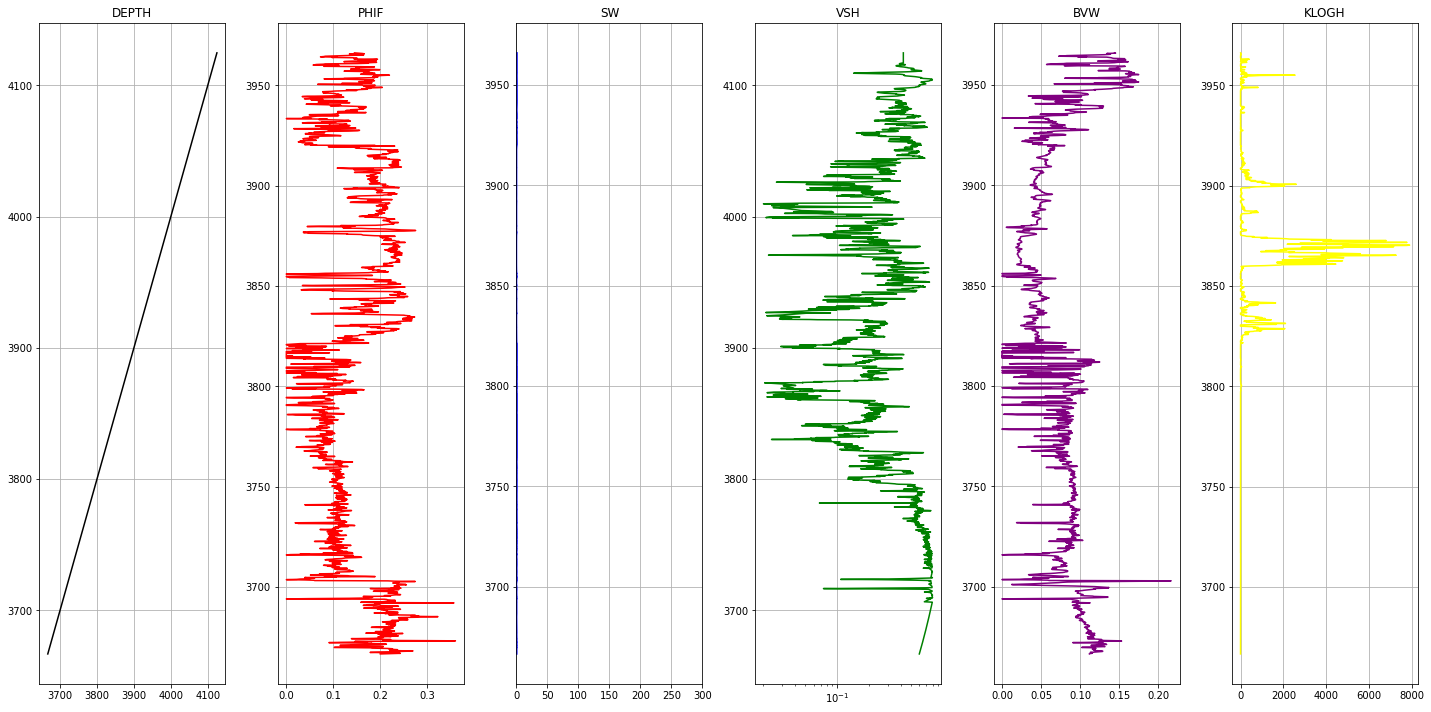

In [74]:
# Display train well data
well = well1 # train wells: well1, well3, well4

# define what logs are we going to us
logs = ['DEPTH','PHIF','SW','VSH','BVW','KLOGH']

# create the subplots; ncols equals the number of logs
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

# looping each log to display in the subplots

colors = ['black', 'red', 'blue', 'green', 'purple','yellow']

for i in range(len(logs)):
  if i == 3:
    # for resistivity, semilog plot
    ax[i].semilogx(well[logs[i]], well['DEPTH'], color=colors[i])
  else:
    # for non-resistivity, normal plot
    ax[i].plot(well[logs[i]], well['DEPTH'], color=colors[i])
  
  ax[i].set_title(logs[i])
  ax[i].grid(True)

ax[2].set_xlim(0, 300)
plt.tight_layout(1.1)
plt.show()

In [75]:
well1.head()

,DEPTH,BS,BVW,CARB_FLAG,COAL_FLAG,DELTA,GRMAX,GRMIN,J,KLHC_INT,KLOGH,M,N,PERF_FLAG,PHIF,PORD,RHOFL,RHOMA,RW,SAND_FLAG,SW,SWIRR,TEMP,VSH
0,3666.5916,8.5,0.111705,0.0,0.0,0.1475,115.0,14.0,0.000163,0.0003,0.0003,1.79,2.45,NaN,0.199843,0.199843,0.8,2.66,0.021643,0.0,0.5590,1.8023,112.7249,0.598800
1,3666.7440,8.5,0.112236,0.0,0.0,0.3583,115.0,14.0,0.000003,0.0000,0.0000,1.79,2.45,NaN,0.218743,0.218743,0.8,2.66,0.021642,0.0,0.5131,7.9467,112.7285,0.599555
2,3666.8964,8.5,0.114825,0.0,0.0,0.1298,115.0,14.0,0.000004,0.0000,0.0000,1.79,2.45,NaN,0.242380,0.242380,0.8,2.66,0.021642,0.0,0.4737,6.5907,112.7321,0.600310
3,3667.0488,8.5,0.114419,0.0,0.0,0.2489,115.0,14.0,0.000002,0.0000,0.0000,1.79,2.45,NaN,0.226408,0.226408,0.8,2.66,0.021641,0.0,0.5054,8.6274,112.7358,0.601065
4,3667.2012,8.5,0.115867,0.0,0.0,0.2072,115.0,14.0,0.000004,0.0000,0.0000,1.79,2.45,NaN,0.216169,0.216169,0.8,2.66,0.021640,0.0,0.5360,6.8473,112.7394,0.601820


In [76]:
well2.head()

,DEPTH,BVW,CARB_FLAG,COAL_FLAG,KLOGH,KLOGV,PHIF,RHOFL,RHOMA,RW,SAND_FLAG,SW,TEMP,VSH
0,3768.0900,0.034643,0.0,0.0,0.0002,0.0001,0.034643,0.9,2.66,0.021472,0.0,1.0,113.7916,0.6610
1,3768.2424,0.032957,0.0,0.0,0.0001,0.0000,0.032957,0.9,2.66,0.021472,0.0,1.0,113.7951,0.6946
2,3768.3948,0.010825,0.0,0.0,0.0000,0.0000,0.010825,0.9,2.66,0.021471,0.0,1.0,113.7986,0.7812
3,3768.5472,0.017037,0.0,0.0,0.0000,0.0000,0.017037,0.9,2.66,0.021471,0.0,1.0,113.8022,0.9155
4,3768.6996,0.044282,0.0,0.0,0.0000,0.0000,0.044282,0.9,2.66,0.021470,0.0,1.0,113.8057,0.9545


In [77]:
well3.head()

,DEPTH,BWV,DT,KLOGH,KLOGV,PHIF,SAND_FLAG,SW,VSH
0,3549.7008,0.08183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3549.8532,0.08183,54.594,NaN,NaN,NaN,NaN,NaN,NaN
2,3550.0056,0.08183,54.594,NaN,NaN,NaN,NaN,NaN,NaN
3,3550.1580,0.08183,54.594,NaN,NaN,NaN,NaN,NaN,NaN
4,3550.3104,0.08183,54.594,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
well3.info(verbose = False, buf=None, max_cols=None, memory_usage=None, null_counts=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7013 entries, 0 to 7012
Columns: 9 entries, DEPTH to VSH
dtypes: float64(9)
memory usage: 493.2 KB


In [79]:
well3.rename(columns = {'BWV':'BVW'}, inplace = True) 

In [80]:
well3.head()

,DEPTH,BVW,DT,KLOGH,KLOGV,PHIF,SAND_FLAG,SW,VSH
0,3549.7008,0.08183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3549.8532,0.08183,54.594,NaN,NaN,NaN,NaN,NaN,NaN
2,3550.0056,0.08183,54.594,NaN,NaN,NaN,NaN,NaN,NaN
3,3550.1580,0.08183,54.594,NaN,NaN,NaN,NaN,NaN,NaN
4,3550.3104,0.08183,54.594,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
# lower limit
low = [3666,3768,3635]

# upper limit
up = [3965,4213,4577]

# train columns to use
train_cols = ['DEPTH','PHIF','SW','VSH','BVW','KLOGH']

# test columns to use
test_cols = ['DEPTH','PHIF','SW','VSH','BVW']

well_df_restrict = [0] * 3

for i in range(len(well_df)):
  # restrict depth within the given lower and upper limit
  df = well_df[i].loc[(well_df[i]['DEPTH'] >= low[i]) & (well_df[i]['DEPTH'] <= up[i])]

  if i == 0 or i == 1:
    # the train data, drop unwanted columns
    well_df_restrict[i] = df[train_cols]
  
  else:
    # the test data, drop unwanted columns
    well_df_restrict[i] = df[test_cols]

well1, well2, well3 = well_df_restrict

# as we can see, both ends already not have NaNs
well1

,DEPTH,PHIF,SW,VSH,BVW,KLOGH
0,3666.5916,0.199843,0.5590,0.598800,0.111705,0.0003
1,3666.7440,0.218743,0.5131,0.599555,0.112236,0.0000
2,3666.8964,0.242380,0.4737,0.600310,0.114825,0.0000
3,3667.0488,0.226408,0.5054,0.601065,0.114419,0.0000
4,3667.2012,0.216169,0.5360,0.601820,0.115867,0.0000
...,...,...,...,...,...,...
1954,3964.3812,0.079970,1.0000,0.642109,0.079970,0.0188
1955,3964.5336,0.082692,1.0000,0.658168,0.082692,0.0214
1956,3964.6860,0.102086,1.0000,0.590238,0.102086,0.1220
1957,3964.8384,0.116699,1.0000,0.534317,0.116699,0.4632


In [116]:
# check if NaNs exist, for each well
well1.isnull().sum()

DEPTH    0
PHIF     0
SW       0
VSH      0
BVW      0
KLOGH    0
dtype: int64

In [83]:
# merge dataframes
well_train = pd.concat([well1, well2])
well_pred = pd.concat([well3])

# assign names
names = ['15_9-19 A', '15_9-19 BT2', '15_9-19 SR']

names_train = []
names_pred = []
for i in range(len(well_df_restrict)):
  if i == 0 or i == 1:
    # train data, assign names 
    _ = np.full(len(well_df_restrict[i]), names[i])
    names_train.append(_)
  else:
    # test data, assign names
    _ = np.full(len(well_df_restrict[i]), names[i])
    names_pred.append(_)

# concatenate inside list
import itertools

names_train = list(itertools.chain.from_iterable(names_train))
names_pred = list(itertools.chain.from_iterable(names_pred))

# include well names to the train and pred dataframe
well_train['WELL'] = names_train
well_pred['WELL'] = names_pred

# move the depth column to the right
depth_train, depth_pred = well_train.pop('DEPTH'), well_pred.pop('DEPTH')
well_train['DEPTH'], well_pred['DEPTH'] = depth_train, depth_pred

well_pred

,PHIF,SW,VSH,BVW,WELL,DEPTH
560,0.246308,0.8176,NaN,0.202052,15_9-19 SR,3635.0448
561,0.247556,0.8132,NaN,0.201377,15_9-19 SR,3635.1972
562,0.249035,0.8111,NaN,0.201305,15_9-19 SR,3635.3496
563,0.250615,0.8141,NaN,0.201983,15_9-19 SR,3635.5020
564,0.251467,0.8158,NaN,0.204027,15_9-19 SR,3635.6544
...,...,...,...,...,...,...
6736,0.112584,1.0000,0.4141,0.103814,15_9-19 SR,4576.2672
6737,0.113838,1.0000,0.4170,0.112584,15_9-19 SR,4576.4196
6738,0.111358,1.0000,0.4246,0.113838,15_9-19 SR,4576.5720
6739,0.101606,1.0000,0.4281,0.111358,15_9-19 SR,4576.7244


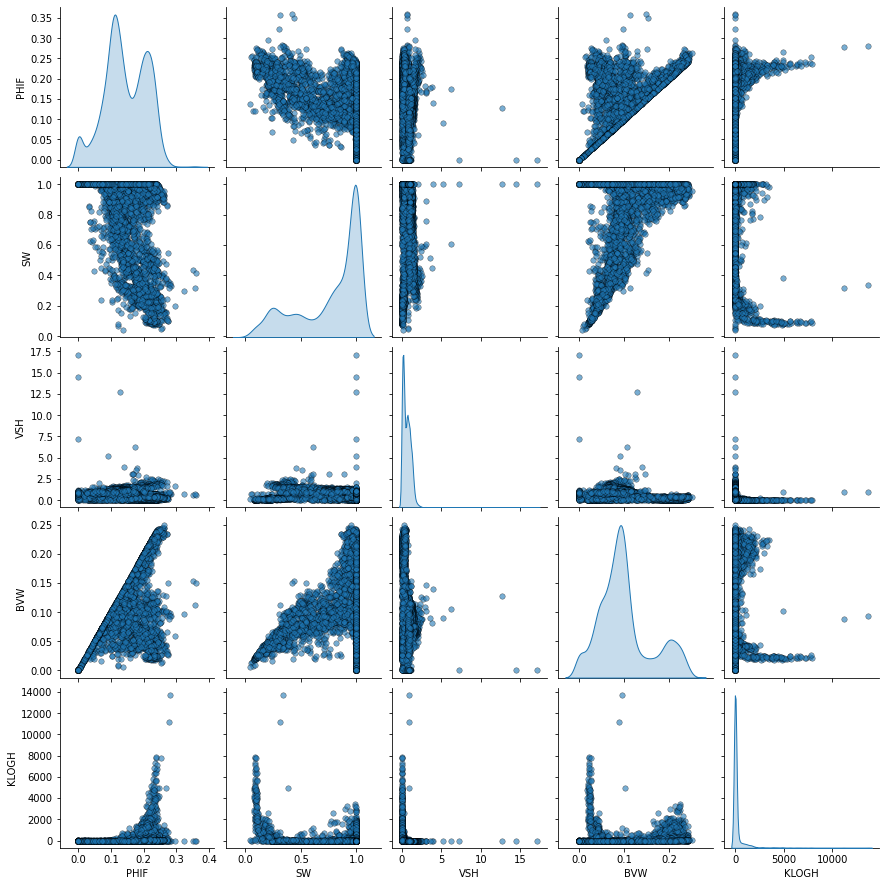

In [84]:
train_features = ['PHIF','SW','VSH','BVW','KLOGH']

sns.pairplot(well_train, vars=train_features, diag_kind='kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

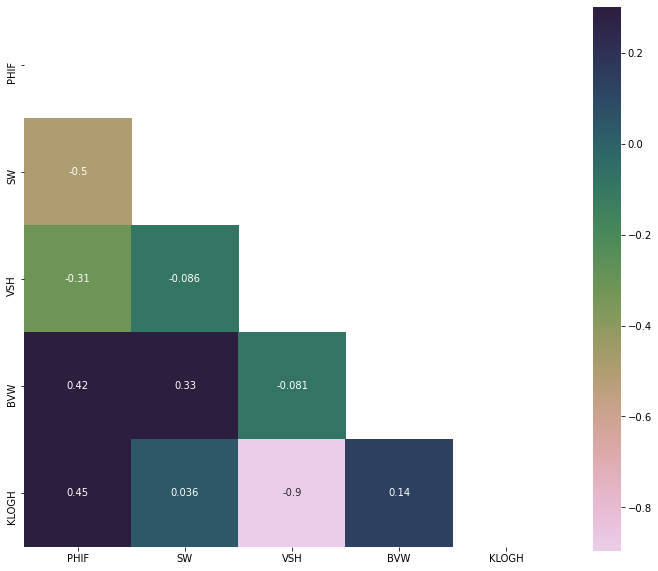

In [85]:
well_train_only_features = well_train[train_features]

# Generate a mask for the upper triangle
mask = np.zeros_like(well_train_only_features.corr(method = 'spearman') , dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.cubehelix_palette(n_colors=12, start=-2.25, rot=-1.3, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(12,10))
sns.heatmap(well_train_only_features.corr(method = 'spearman') ,annot=True,  mask=mask, cmap=cmap, vmax=.3, square=True)

plt.show()

In [86]:
colnames = well_train.columns
only_feature = ['PHIF','SW','VSH','BVW'] # only feature column names
only_target = 'KLOGH' # only target column names
feature_target = np.append(only_feature, only_target) # feature and target column names

colnames

Index(['PHIF', 'SW', 'VSH', 'BVW', 'KLOGH', 'WELL', 'DEPTH'], dtype='object')

In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

# transform the RT to logarithmic
well_train['VSH'] = np.log10(well_train['VSH'])

# normalize using power transform Yeo-Johnson method
scaler = PowerTransformer(method='yeo-johnson')

## ColumnTransformer
column_drop = ['WELL', 'DEPTH']
ct = ColumnTransformer([('transform', scaler, feature_target)], remainder='passthrough')

## fit and transform
well_train_norm = ct.fit_transform(well_train)

## convert to dataframe
well_train_norm = pd.DataFrame(well_train_norm, columns=colnames)
well_train_norm

,PHIF,SW,VSH,BVW,KLOGH,WELL,DEPTH
0,0.880538,-1.03232,0.195441,0.358136,-0.75194,15_9-19 A,3666.59
1,1.19819,-1.14783,0.196827,0.367183,-0.752285,15_9-19 A,3666.74
2,1.60469,-1.23678,0.198212,0.41094,-0.752285,15_9-19 A,3666.9
3,1.32888,-1.16593,0.199597,0.404117,-0.752285,15_9-19 A,3667.05
4,1.15454,-1.09186,0.20098,0.428386,-0.752285,15_9-19 A,3667.2
...,...,...,...,...,...,...,...
4874,-1.31719,0.978134,0.805283,-0.733162,-0.75148,15_9-19 BT2,4212.34
4875,-1.37362,0.978134,0.906385,-0.826173,-0.751825,15_9-19 BT2,4212.49
4876,-1.23707,0.978134,0.943211,-0.605318,-0.751595,15_9-19 BT2,4212.64
4877,-1.08223,0.978134,0.870897,-0.371452,-0.750104,15_9-19 BT2,4212.79


In [88]:
x = well_train_norm[feature_target].astype(float)
y = well_train_norm['WELL'].astype(str)
z = well_train_norm['DEPTH'].astype(float)

well_train_norm = pd.concat([x, y, z], axis=1)

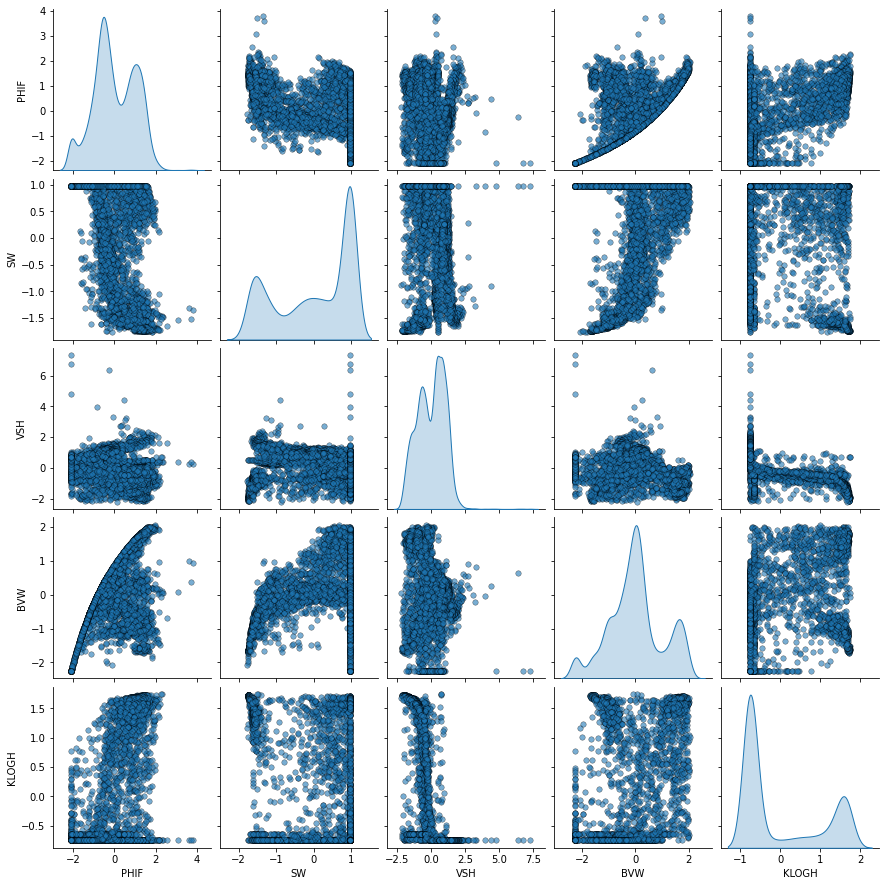

In [89]:
# x = well_train_norm[feature_target].astype(float)
sns.pairplot(well_train_norm, vars=feature_target, diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

In [90]:
# make copy of well_train_norm, called well_train_dropped
well_train_drop = well_train_norm.copy()

# on the well_train_drop, drop WELL and DEPTH column
well_train_drop = well_train_norm.drop(['WELL', 'DEPTH'], axis=1)

In [91]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Method 1: Standard Deviation Method (traditional)
well_train_std = well_train_drop[np.abs(well_train_drop - well_train_drop.mean()) <= (3 * well_train_drop.std())]

## delete all rows that have NaNs
well_train_std = well_train_std.dropna()

# Method 2: Isolation Forest
iso = IsolationForest(contamination=0.5)
yhat = iso.fit_predict(well_train_drop)
mask = yhat != -1
well_train_iso = well_train_norm[mask]

# Method 3: Minimum Covariance Determinant
ee = EllipticEnvelope(contamination=0.1)
yhat = ee.fit_predict(well_train_drop)
mask = yhat != -1
well_train_ee = well_train_norm[mask]

# Method 4: Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.3)
yhat = lof.fit_predict(well_train_drop)
mask = yhat != -1
well_train_lof = well_train_norm[mask]

# Method 5: One-class SVM
svm = OneClassSVM(nu=0.1)
yhat = svm.fit_predict(well_train_drop)
mask = yhat != -1
well_train_svm = well_train_norm[mask]

Number of points before outliers removed                       : 4879
Number of points after outliers removed with Standard Deviation: 4866
Number of points after outliers removed with Isolation Forest  : 2440
Number of points after outliers removed with Min. Covariance   : 4391
Number of points after outliers removed with Outlier Factor    : 3415
Number of points after outliers removed with One-class SVM     : 4390


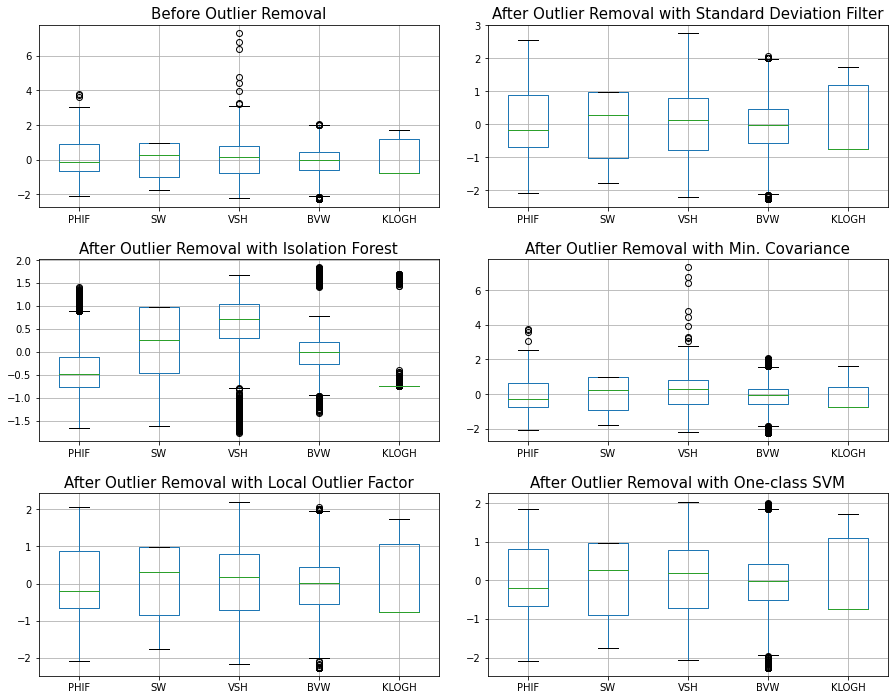

In [92]:
print('Number of points before outliers removed                       :', len(well_train_norm))
print('Number of points after outliers removed with Standard Deviation:', len(well_train_std))
print('Number of points after outliers removed with Isolation Forest  :', len(well_train_iso))
print('Number of points after outliers removed with Min. Covariance   :', len(well_train_ee))
print('Number of points after outliers removed with Outlier Factor    :', len(well_train_lof))
print('Number of points after outliers removed with One-class SVM     :', len(well_train_svm))

plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
well_train_norm[feature_target].boxplot()
plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
well_train_std[feature_target].boxplot()
plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
well_train_iso[feature_target].boxplot()
plt.title('After Outlier Removal with Isolation Forest', size=15)

plt.subplot(3,2,4)
well_train_ee[feature_target].boxplot()
plt.title('After Outlier Removal with Min. Covariance', size=15)

plt.subplot(3,2,5)
well_train_lof[feature_target].boxplot()
plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(3,2,6)
well_train_svm[feature_target].boxplot()
plt.title('After Outlier Removal with One-class SVM', size=15)

plt.tight_layout(1.7)
plt.show()

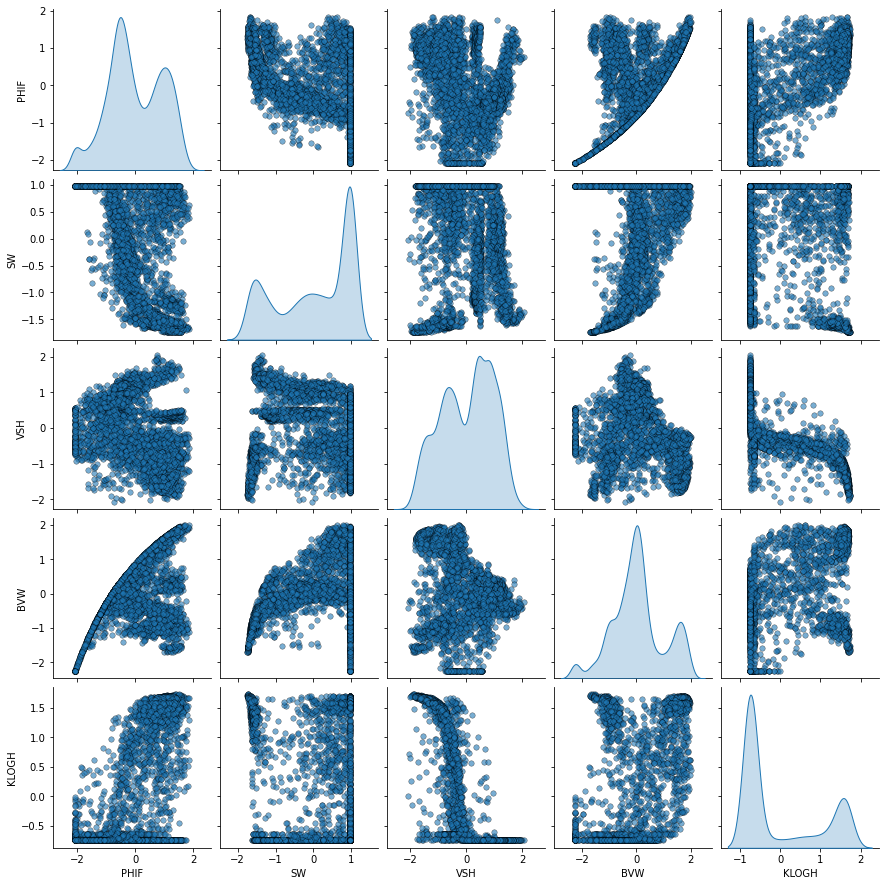

In [93]:
sns.pairplot(well_train_svm, vars=feature_target,
             diag_kind='kde',
             plot_kws = {'alpha': 0.6, 's': 30, 'edgecolor': 'k'})

In [94]:
# Define the train data
feature = ['PHIF','SW','VSH','BVW']
target = 'KLOGH'

X_train = well_train_svm[only_feature].values
y_train = well_train_svm[only_target].values

In [95]:
well_train_svm

,PHIF,SW,VSH,BVW,KLOGH,WELL,DEPTH
0,0.880538,-1.032318,0.195441,0.358136,-0.751940,15_9-19 A,3666.5916
1,1.198189,-1.147829,0.196827,0.367183,-0.752285,15_9-19 A,3666.7440
2,1.604687,-1.236780,0.198212,0.410940,-0.752285,15_9-19 A,3666.8964
3,1.328881,-1.165929,0.199597,0.404117,-0.752285,15_9-19 A,3667.0488
4,1.154543,-1.091861,0.200980,0.428386,-0.752285,15_9-19 A,3667.2012
...,...,...,...,...,...,...,...
4874,-1.317191,0.978134,0.805283,-0.733162,-0.751480,15_9-19 BT2,4212.3360
4875,-1.373617,0.978134,0.906385,-0.826173,-0.751825,15_9-19 BT2,4212.4884
4876,-1.237071,0.978134,0.943211,-0.605318,-0.751595,15_9-19 BT2,4212.6408
4877,-1.082228,0.978134,0.870897,-0.371452,-0.750104,15_9-19 BT2,4212.7932


In [96]:
# Define the test data 
well_pred1 = well_train_norm.copy()

names_train = ['15_9-19 A', '15_9-19 BT2']

X_test = []

y_test = []
for i in range(len(names_train)):
  # split the df with respect to its name
  test = well_pred1.loc[well_pred1['WELL'] == names_train[i]]

  # Drop well name column 
  test = test.drop(['WELL'], axis=1)

  # define X_test (feature) and y_test (target)
  X_test_, y_test_ = test[only_feature].values, test[only_target].values
  
  X_test.append(X_test_)
  y_test.append(y_test_)

# for each well 1, 3, and 4
X_test1, X_test2 = X_test
y_test1, y_test2 = y_test

In [97]:
X_test1

array([[ 0.88053839, -1.03231842,  0.19544095,  0.35813573],
       [ 1.19818894, -1.1478289 ,  0.19682723,  0.36718303],
       [ 1.60468725, -1.23677963,  0.19821243,  0.41093997],
       ...,
       [-0.65902339,  0.97813409,  0.17964349,  0.18984129],
       [-0.43980239,  0.97813409,  0.07275961,  0.44224875],
       [-0.02505495,  0.82435174, -0.05714525,  0.66797327]])

In [98]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# Create the regressor
model = GradientBoostingRegressor()
# print(model)

# Fit the regressor to the training data
model.fit(X_train, y_train)

# Predict on well 1
y_pred1 = model.predict(X_test1)
print("R-squared of Well 1: {}".format(model.score(X_test1, y_test1)))
rmse = np.sqrt(mean_squared_error(y_test1, y_pred1))
print("RMSE of Well 1: {}".format(rmse))

# Predict on well 3
y_pred2 = model.predict(X_test2)
print("R-squared of Well 2: {}".format(model.score(X_test2, y_test2)))
rmse = np.sqrt(mean_squared_error(y_test2, y_pred2))
print("RMSE of Well 2: {}".format(rmse))


R-squared of Well 1: 0.9209952694225568
RMSE of Well 1: 0.288523532376663
R-squared of Well 2: 0.9356036367175244
RMSE of Well 2: 0.24702443373625216


In [99]:
# make the transformer fit to the target
y = well_train[target].values
scaler.fit(y.reshape(-1,1))

# denormalize y_test, y_pred
y_test1, y_pred1 = scaler.inverse_transform(y_test1.reshape(-1,1)), scaler.inverse_transform(y_pred1.reshape(-1,1))
y_test2, y_pred2 = scaler.inverse_transform(y_test2.reshape(-1,1)), scaler.inverse_transform(y_pred2.reshape(-1,1))


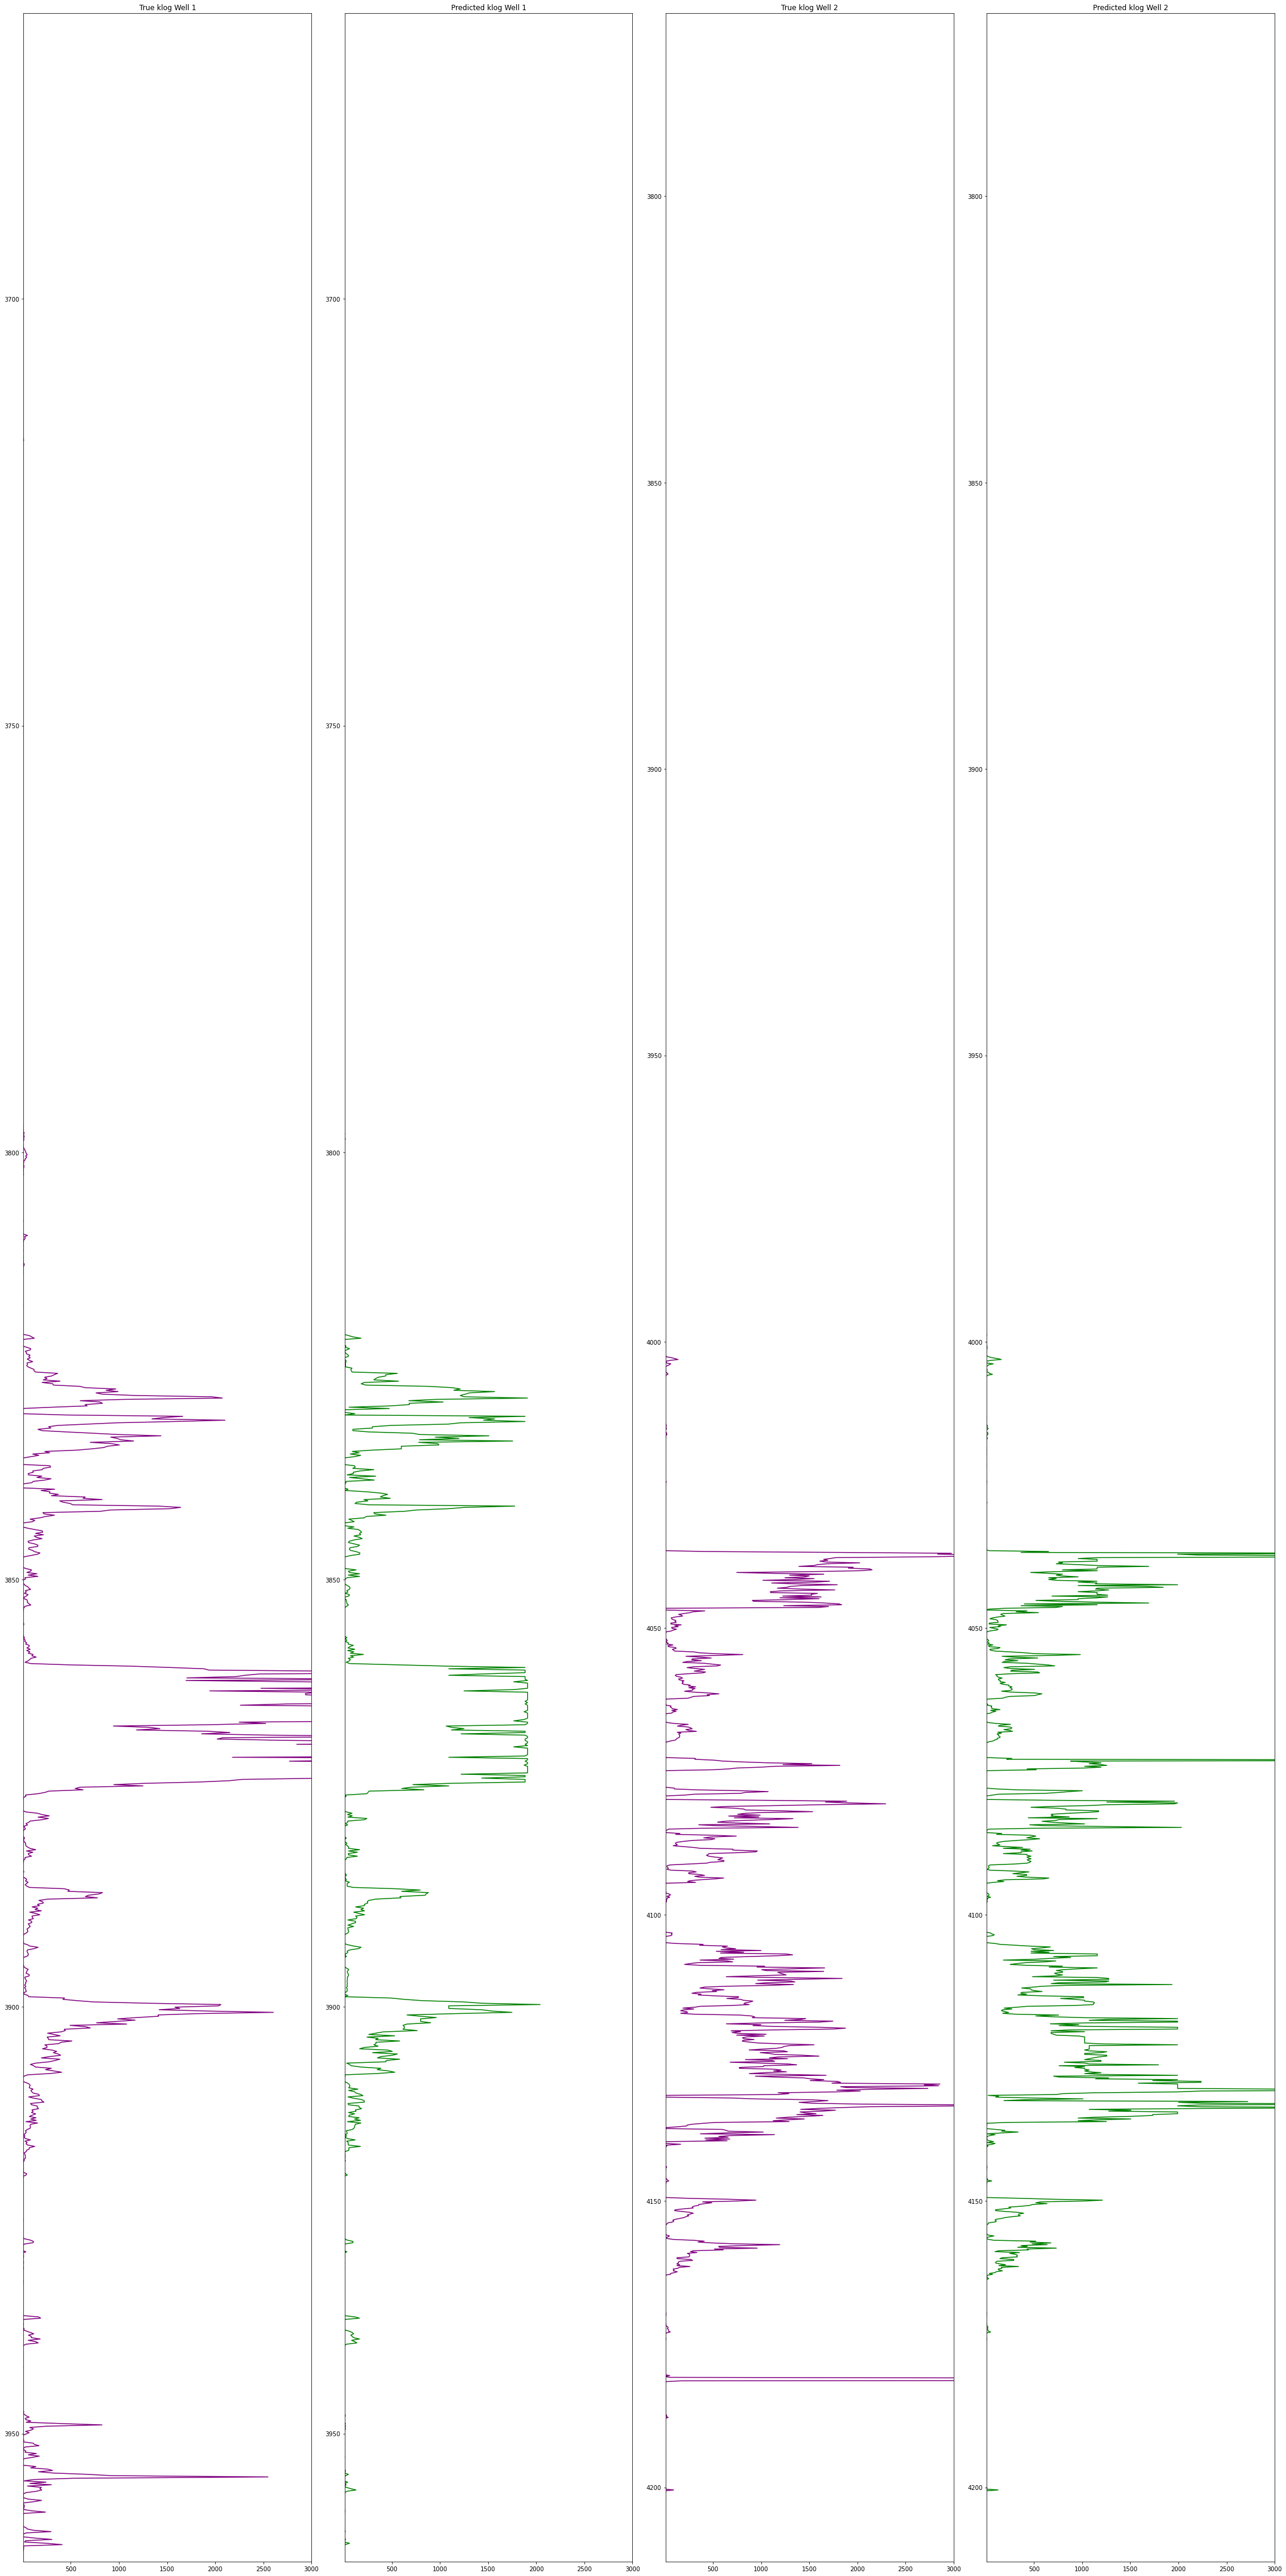

In [120]:
x = [y_test1, y_pred1, y_test2, y_pred2]
y = [well1['DEPTH'], well1['DEPTH'], well2['DEPTH'], well2['DEPTH']]

color = ['purple', 'green', 'purple', 'green']
title = ['True klog Well 1', 'Predicted klog Well 1', 'True klog Well 2', 'Predicted klog Well 2']

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30,60))

for i in range(len(x)):
  ax[i].plot(x[i], y[i], color=color[i])
  ax[i].set_xlim(10,3000)
  ax[i].set_ylim(np.max(y[i]), np.min(y[i]))
  ax[i].set_title(title[i])

plt.tight_layout()

plt.show()

In [142]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

# Define the X and y from the SVM normalized dataset
X = well_train_svm[only_feature].values
y = well_train_svm[only_target].values

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [143]:
model = GradientBoostingRegressor()

## Hyperparameters
max_depth = [10, 100]
# max_features = ['auto', 'sqrt']
min_samples_leaf = [1, 4]
min_samples_split = [2, 10]
n_estimators = [100, 1000]

param_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth}

## Randomized CV
model_random = GridSearchCV(model, param_grid, cv=3)
model_random.fit(X_train, y_train)

## print best model
model_random.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [138]:
# Define X_train and y_train
X_train = well_train[only_feature].values
# y_train = well_train[only_target].values.reshape(-1,1)
y_train = well_train[only_target].values

In [139]:
# Define the test data 
names_train = ['15_9-19 SR']

X_test = []
y_test = []
depths = []
for i in range(len(names_train)):
  # split the df with respect to its name
  test = well_pred.loc[well_pred['WELL'] == names_train[i]]

  # Drop well name column 
  test = test.drop(['WELL'], axis=1)

  # define X_test (feature)
  X_test_ = test[only_feature].values

  # define depth
  depth_ = test['DEPTH'].values
  
  X_test.append(X_test_)
  depths.append(depth_)

# for each well 2 and 5
X_test3 = X_test
depth3 = depths

In [141]:
# Normalize X_test of well 2 and 5
X_test3 = scaler.fit_transform(X_test3)


# Predict to well 2 and 5
y_pred3 = model.predict(X_test3)


# Denormalize y_pred of well 2 and 5
# make the transformer fit to the target
y = well_train[target].values
scaler.fit(y.reshape(-1,1))

# denormalize y_test, y_pred
y_pred2 = scaler.inverse_transform(y_pred2.reshape(-1,1))


NotFittedError: ignored

In [101]:
, 

("'15_9-19", "SR'")